In [8]:
import numpy as np #导入NumPy数学工具箱
import pandas as pd #导入Pandas数据处理工具箱
df_bank = pd.read_csv("../dataset/BankCustomer.csv") # 读取文件
df_bank.head() # 显示文件前5行

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


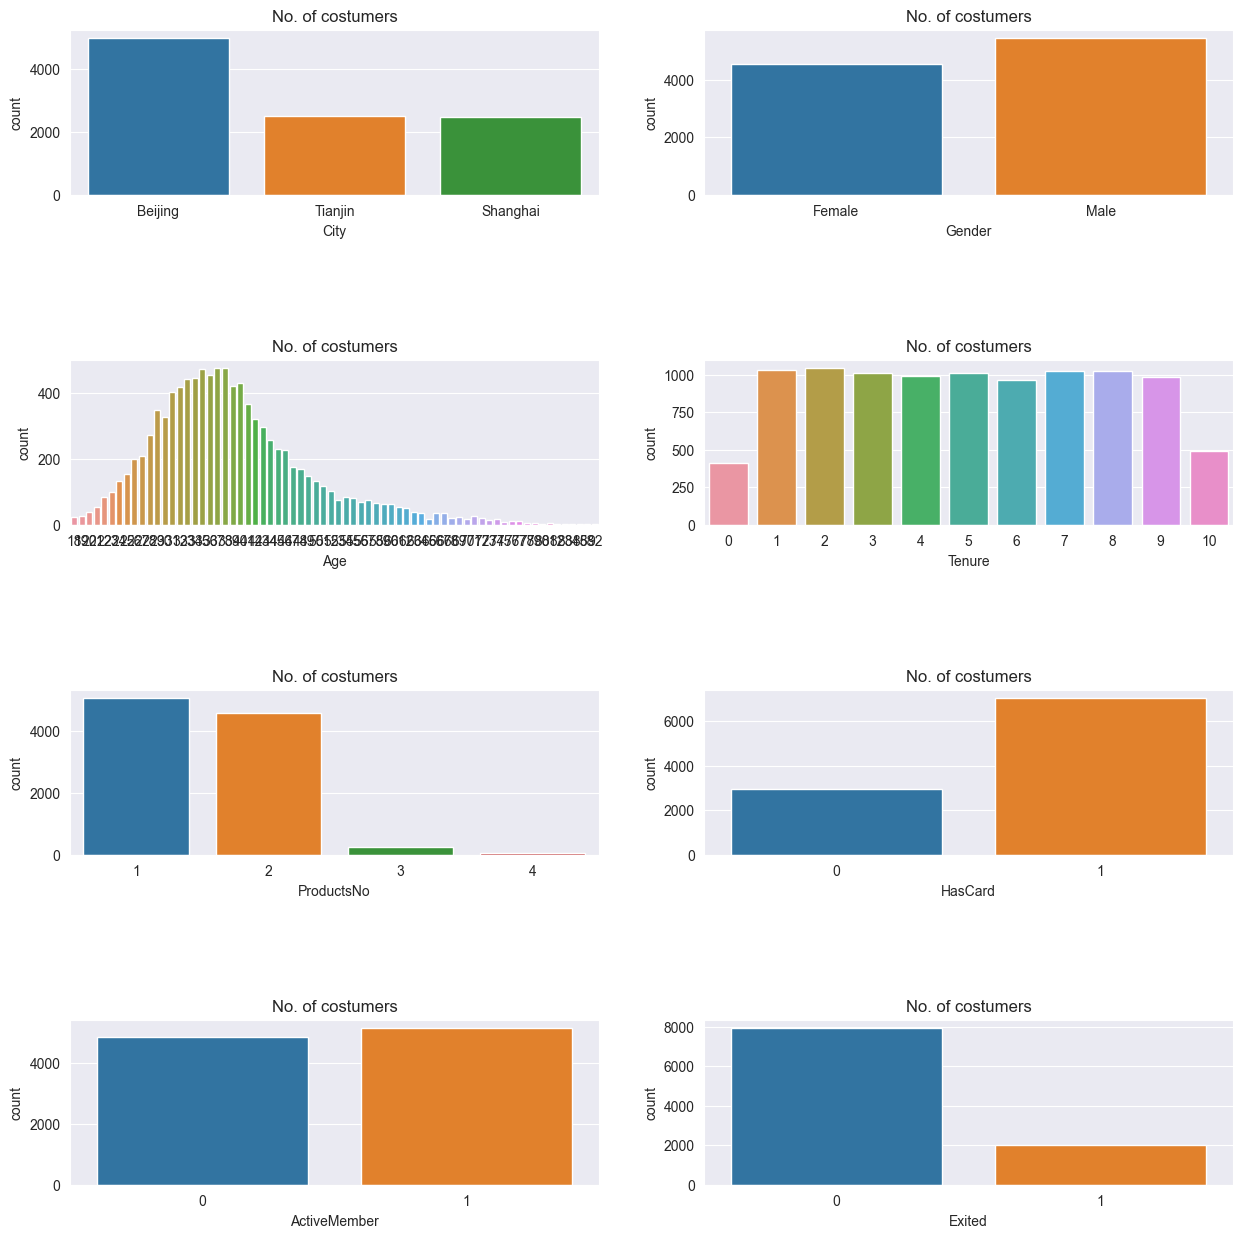

In [9]:
import matplotlib.pyplot as plt #导入matplotlib画图工具箱
import seaborn as sns #导入seaborn画图工具箱
# 显示不同特征的分布情况
features=[ 'City', 'Gender','Age','Tenure', 
           'ProductsNo', 'HasCard', 'ActiveMember', 'Exited']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df_bank)
    plt.title("No. of costumers")

In [10]:
# 把二元类别文本数字化
df_bank['Gender'].replace("Female",0,inplace = True)
df_bank['Gender'].replace("Male",1,inplace=True)
# 显示数字类别
print("Gender unique values",df_bank['Gender'].unique())
# 把多元类别转换成多个二元哑变量，然后贴回原始数据集
d_city = pd.get_dummies(df_bank['City'], prefix = "City")
df_bank = [df_bank, d_city]
df_bank = pd.concat(df_bank, axis = 1)
# 构建特征和标签集合
y = df_bank ['Exited']
X = df_bank.drop(['Name', 'Exited','City'], axis=1)
X.head() #显示新的特征集

Gender unique values [0 1]


,Gender,Age,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,City_Beijing,City_Shanghai,City_Tianjin
0,0,40,9,2,0,1,516,6360.66,0.0000,1,0,0
1,1,69,6,2,0,1,682,28605.00,0.0000,1,0,0
2,0,32,9,1,1,1,803,10378.09,236311.0932,1,0,0
3,0,37,0,2,1,1,778,25564.01,129909.8079,0,0,1
4,1,55,4,3,1,0,547,3235.61,136976.1948,0,0,1


In [11]:
from sklearn.model_selection import train_test_split #拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression # 导入Sklearn模型
lr = LogisticRegression() # 逻辑回归模型
history = lr.fit(X_train,y_train) # 训练机器
print("逻辑回归测试集准确率 {:.2f}%".format(lr.score(X_test,y_test)*100))

逻辑回归测试集准确率 78.30%


C:\Users\nouse\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
import keras # 导入Keras库
from tensorflow.keras.models import Sequential # 导入Keras序贯模型
from tensorflow.keras.layers import Dense # 导入Keras密集连接层
ann = Sequential() # 创建一个序贯ANN(Artifical Neural Network)模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
ann.summary() # 显示网络模型(这个语句不是必须的)

AlreadyExistsError: Another metric with the same name already exists.

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(ann,show_shapes = True ).create(prog='dot', format='svg'))

In [ ]:
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer = 'adam',           #优化器
            loss = 'binary_crossentropy', #损失函数  
            metrics = ['acc'])       #评估指标

In [ ]:
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(X_test, y_test)) #指定验证集,这里为了简化模型，直接用测试集数据进行验证

In [ ]:
# 这段代码参考《Python深度学习》一书中的学习曲线的实现
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
show_history(history) # 调用这个函数，并将神经网络训练历史数据作为参数输入

In [ ]:
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 四舍五入，将分类概率值转换成0/1整数值

In [ ]:
from sklearn.metrics import classification_report # 导入分类报告
def show_report(X_test, y_test, y_pred): # 定义一个函数显示分类报告
    if y_test.shape != (2000,1):
        y_test = y_test.values # 把Panda series转换成Numpy array
        y_test = y_test.reshape((len(y_test),1)) # 转换成与y_pred相同的形状 
    print(classification_report(y_test,y_pred,labels=[0, 1])) #调用分类报告   

In [ ]:
from sklearn.metrics import confusion_matrix # 导入混淆矩阵
def show_matrix(y_test, y_pred): # 定义一个函数显示混淆矩阵
    cm = confusion_matrix(y_test,y_pred) # 调用混淆矩阵
    plt.title("ANN Confusion Matrix") # 标题
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False) # 热力图设定
    plt.show() # 显示混淆矩阵

**特征缩放（Feature Scaling）**

In [ ]:
# mean = X_train.mean(axis=0) # 计算训练集均值
# X_train -= mean # 训练集减去训练集均值
# std = X_train.std(axis=0) # 计算训练集方差
# X_train /= std # 训练集除以训练集标准差
# X_test -= mean # 测试集减去训练集均值
# X_test /= std # 测试集减去训练集均值

In [ ]:
from sklearn.preprocessing import StandardScaler # 导入特征缩放器
sc = StandardScaler() # 特征缩放器
X_train = sc.fit_transform(X_train) # 拟合并应用于训练集
X_test = sc.transform (X_test) # 训练集结果应用于测试集

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # 逻辑回归模型
history = lr.fit(X_train,y_train) # 训练机器
print("逻辑回归测试集准确率 {:.2f}%".format(lr.score(X_test,y_test)*100))

**特征工程后重新调用神经网络**

In [ ]:
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(X_test, y_test)) #指定验证集
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

In [ ]:
show_history(history)

In [ ]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

**深层神经网络**

In [ ]:
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# 编译神经网络，指定优化器，损失函数，以及评估指标
ann.compile(optimizer = 'RMSprop', # 优化器
            loss = 'binary_crossentropy', # 损失函数
            metrics = ['acc']) # 评估指标
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(X_test, y_test)) # 指定验证集
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

In [ ]:
show_history(history)

In [ ]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

**尝试不同的优化器**

In [ ]:
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

In [ ]:
show_history(history)

In [ ]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

**添加Dropout层**

In [ ]:
# from keras.layers import Dropout # 导入Dropout
# ann = Sequential() # 创建一个序贯ANN模型
# ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
# ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# # 编译神经网络，指定优化器，损失函数，以及评估标准
# ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc']) 
# history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
# y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
# y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

In [ ]:
from keras.layers import Dropout # 导入Dropout
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
ann.compile(optimizer = 'adam', # 优化器
              loss = 'binary_crossentropy', #损失函数 
              metrics = ['acc']) # 评估指标
history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

In [ ]:
show_history(history)

In [ ]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)